# Preliminary Beam Maps for 5/23/2023 Flights

In [44]:
## NF Beammapping test flights with reference antenna in Wright Lab Connector (Sep 16 2022)
## Channel 0 = Bicolog 30100 Antenna, set up NS polarized ~11m West of dish
## Channel 1 = 3m Dish with Vivaldi Antenna NS polarization

##From loadD3Adata_Dallas.py:
from matplotlib.pyplot import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
import numpy as np
import h5py
##From WT:
import datetime
import pytz
import os
import glob
from matplotlib import colors
import pandas
import csv
%matplotlib inline
import calendar

from beamcals import corr
from beamcals import concat
from beamcals import drone
from beamcals import bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
wlcsite=site.site('newburghlabdrone/beamcals/beamcals/sites/WLC_config.npz')

In [45]:
# only want to look at FF flights for now
fileslist=['FLY779.csv','FLY784.csv']


In [46]:
dronedir='/hirax/20230519_WLC_NFandFF/20230519_DJI_RTK/'
FFNSdrone=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY779.csv',site_class=wlcsite)

## Drone flight Data: 100m drone flight, NS polarization
gaindir='/hirax/20230519_WLC_NFandFF/20230519T175258Z_Suit_digitalgain/'
datadir='/hirax/20230519_WLC_NFandFF/20230519T175258Z_Suit/corr/20230519T175317Z/'

FFNScorr=corr.Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir,site_class=wlcsite,use_ctime=True,crossmap=[1])

Initializing drone data via datcon_csv routine: FLY779.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 11761/11761 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
Initializing Correlator Class using:
  --> /hirax/20230519_WLC_NFandFF/20230519T175258Z_Suit/corr/20230519T175317Z/
  --> Arrays initialized with shape (1058, 64, 1024, 2)
Assigning array values by reading in data files:
  --> Loading File: 1057/1057
  --> Finished. Reshaping arrays.


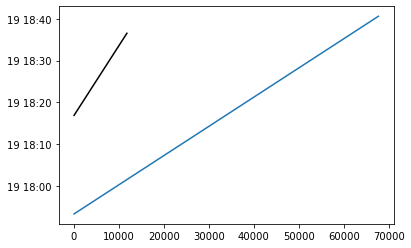

In [47]:
plot(FFNSdrone.t_arr_datetime,c='black')
plot(FFNScorr.t_arr_datetime)

In [48]:
FFNSconcat=concat.CONCAT(CORRDATCLASS=FFNScorr,DRONEDATCLASS=FFNSdrone,\
                       config_directory="/hirax/20230519_WLC_NFandFF/",\
                       output_directory="/home/am3674/20230519_WLC_NFFF/",\
                       load_yaml=False,save_traceback=False,traceback=True)



Initializing CONCAT CLASS with active traceback using:
  --> /hirax/20230519_WLC_NFandFF/20230519T175258Z_Suit/corr/20230519T175317Z/
  --> FLY779.csv
  --> Traceback outputs will not be saved...
Concat initialized without previous config file...
Interpolating drone coordinates for each correlator timestamp:
  --> correlator timestamp axis contains 28131 elements
  --> drone timestamp axis contains 11761 elements


Maximum Pearson_R Correlations between data and square wave function:
  --> t_indices = [325. 325.]
  --> t_deltas = [-0.27 -0.27]
Selecting square wave function time offset:
  --> t_delta_pulse = -0.2698698698
Finding relevant pulsing indices and checking for overlaps:
  --> on/off ind intersection: []
  --> on/span ind intersection: []
  --> off/span ind intersection: []


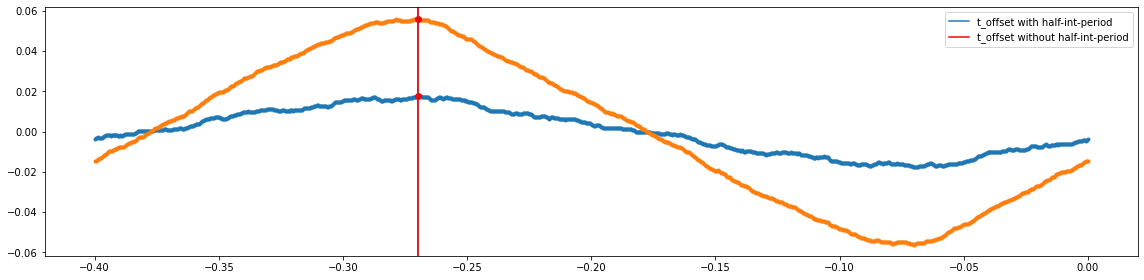

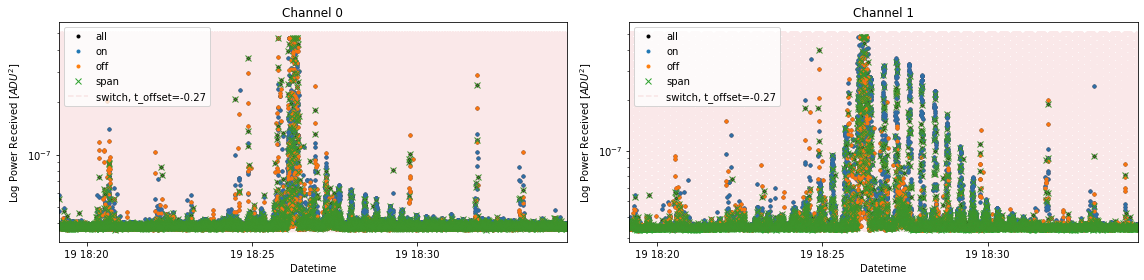

In [49]:
FFNSconcat.Extract_Source_Pulses(f_ind=[324],t_bounds=[37000,59000])



In [50]:
FFNSconcat.Perform_Background_Subtraction(window_size=25)


Calculating background spectra from indices where the noise source is off.
  --> Background subtraction completed using window_size = 25


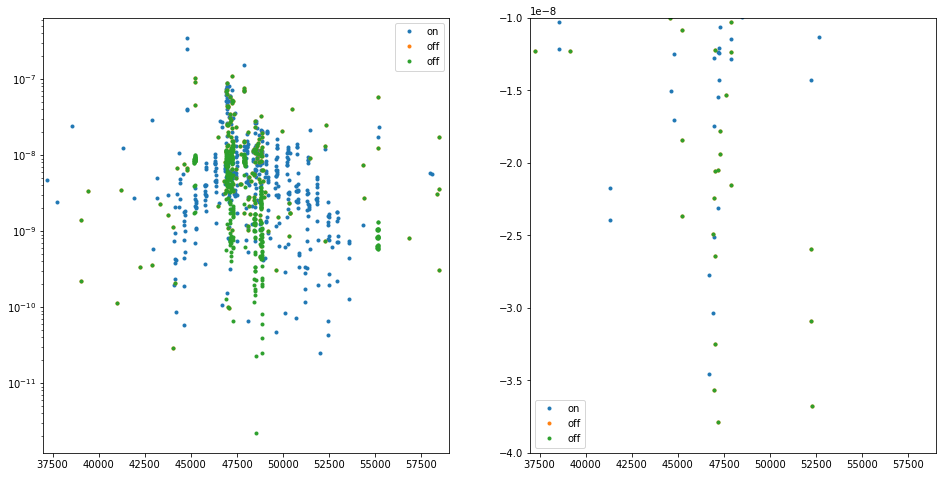

In [53]:
## Testing Background Subtraction:
fig1,[ax1,ax2]=subplots(nrows=1,ncols=2,figsize=(16,8))
ax1.semilogy(FFNSconcat.t_index[FFNSconcat.inds_on],np.real(FFNSconcat.V_cross[FFNSconcat.inds_on,320]),'.',label='on')
ax1.plot(FFNSconcat.t_index[FFNSconcat.inds_off],np.real(FFNSconcat.V_cross[FFNSconcat.inds_off,320]),'.',label='off')
ax1.plot(FFNSconcat.t_index[:],np.real(FFNSconcat.V_cross_bg[:,320]),'.',label='off')
#ax1.set_ylim(1e-12,1e-7)
ax2.plot(FFNSconcat.t_index[FFNSconcat.inds_on],np.imag(FFNSconcat.V_cross[FFNSconcat.inds_on,320]),'.',label='on')
ax2.plot(FFNSconcat.t_index[FFNSconcat.inds_off],np.imag(FFNSconcat.V_cross[FFNSconcat.inds_off,320]),'.',label='off')
ax2.plot(FFNSconcat.t_index[:],np.imag(FFNSconcat.V_cross_bg[:,320]),'.',label='off')
ax2.set_ylim(-4e-8,-1e-8)
for ax in [ax1,ax2]:
    ax.set_xlim(37000,59000)
    ax.legend()

Synchronizing data from correlator and drone:
  --> Previous t_delta_dji not found
  --> Calculating via 2DGauss fitting routine:


/home/am3674/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/am3674/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


Applying a time correction of 0.04 seconds using Channel 1 fits.
  --> Variable synchronation successful, generating output plots:


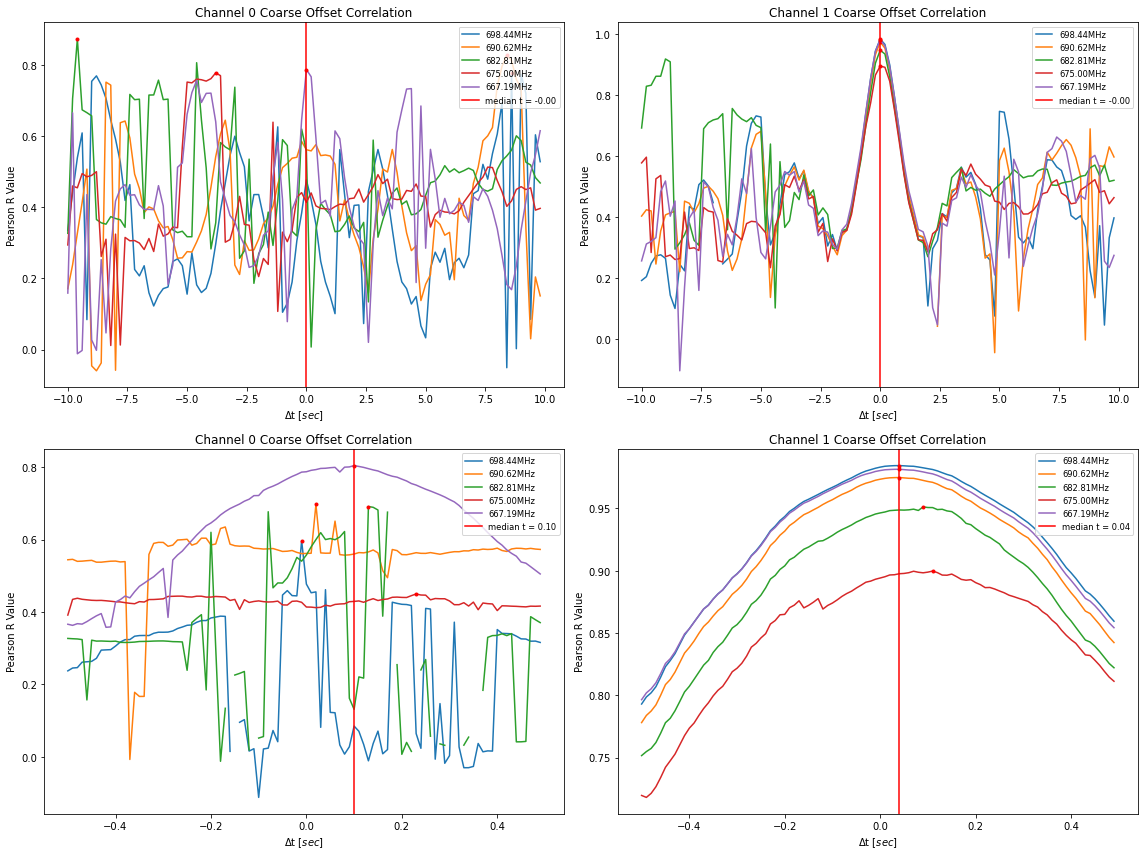

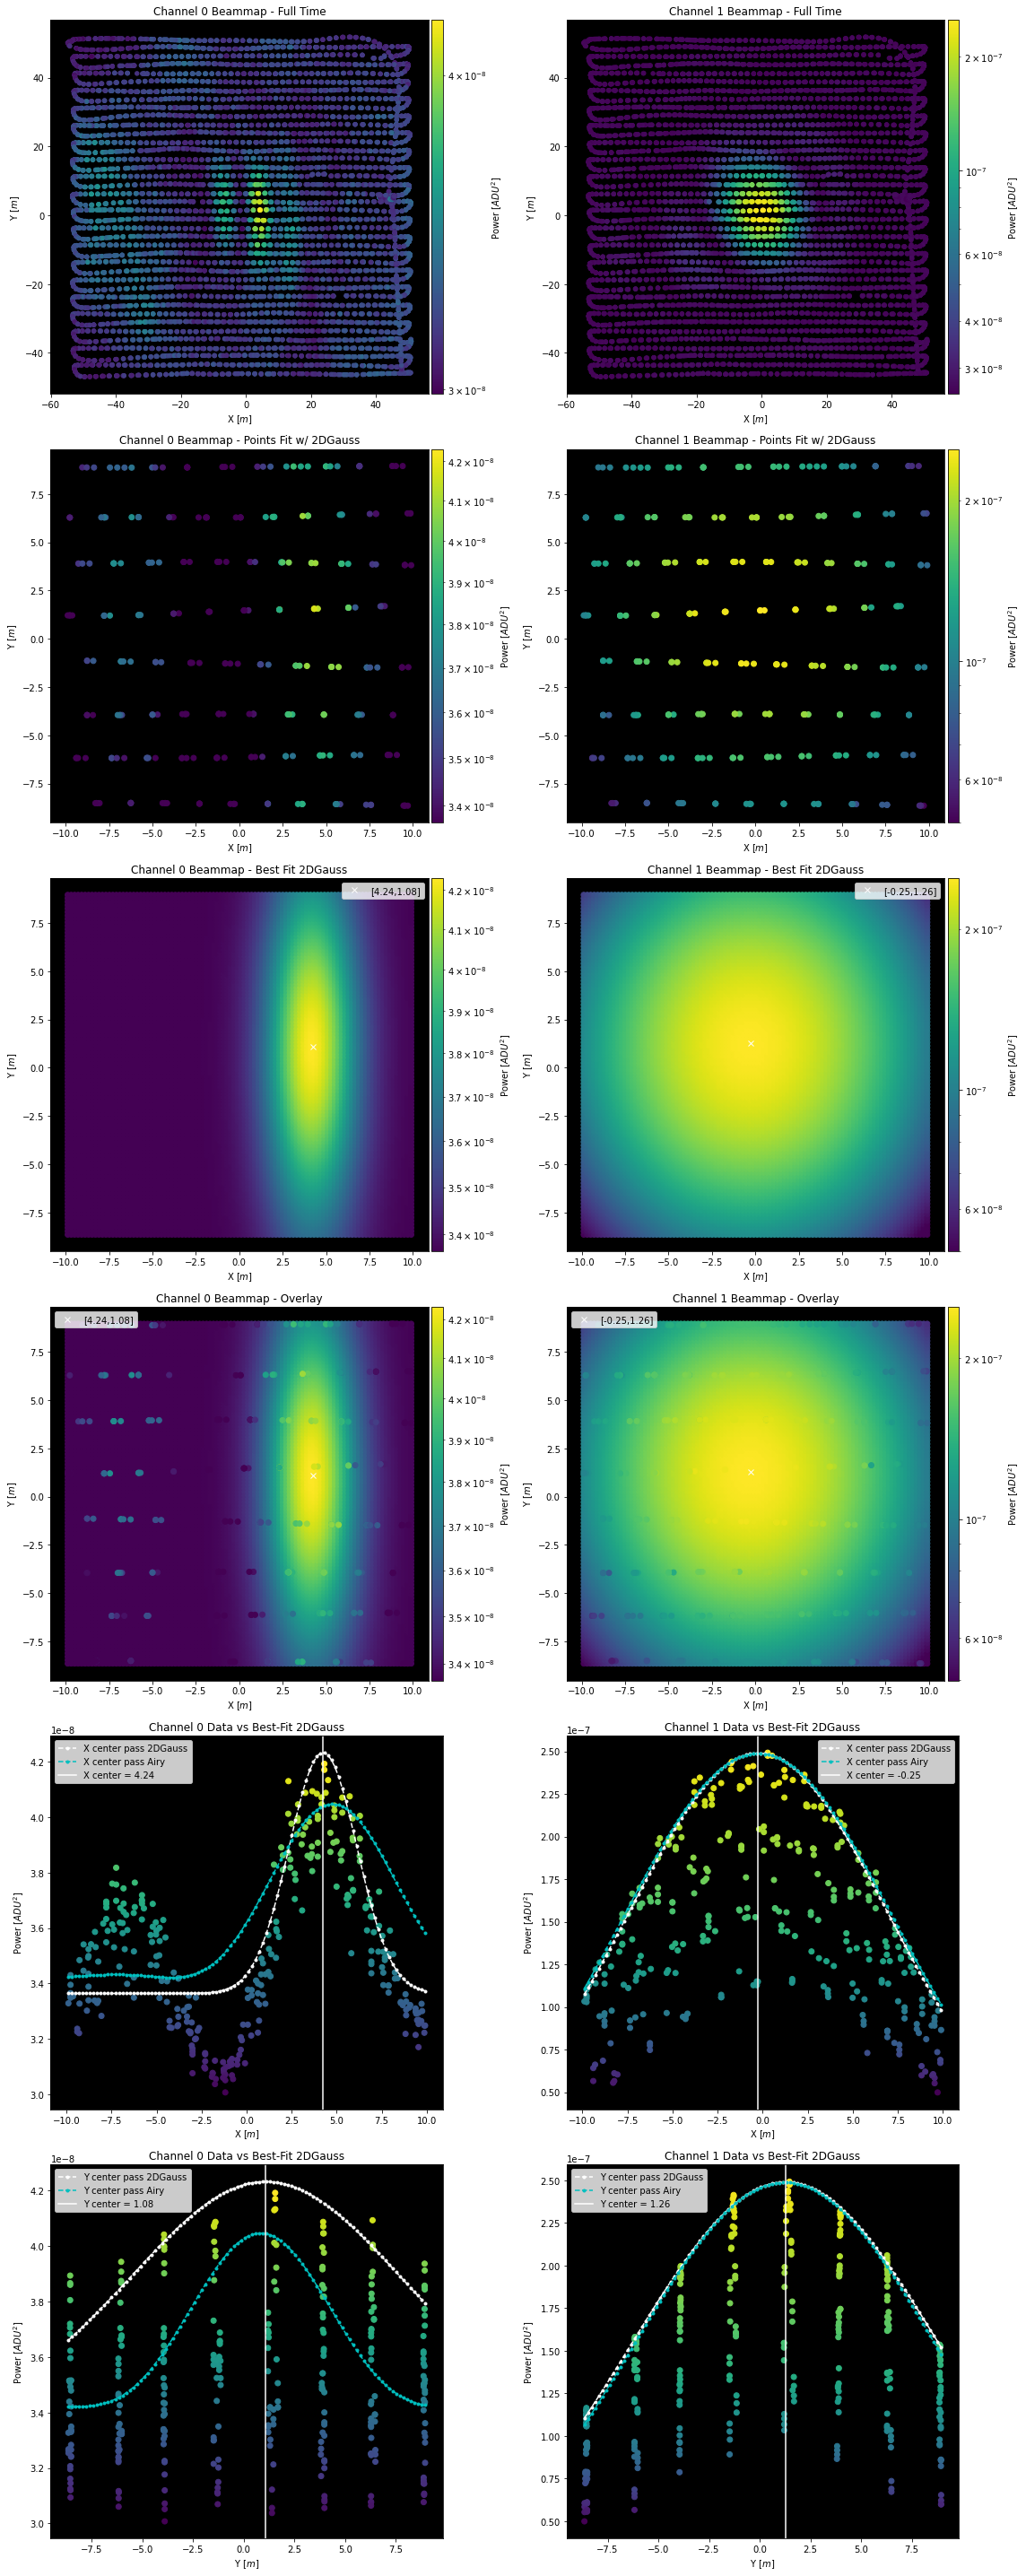

In [54]:
FFNSconcat.Synchronization_Function(inputcorr=FFNScorr,inputdrone=FFNSdrone,freqs=np.arange(260,355,20),\
                                    FMB_coordbounds=[10.0,10.0,20.0],FMB_ampbound=0.999)

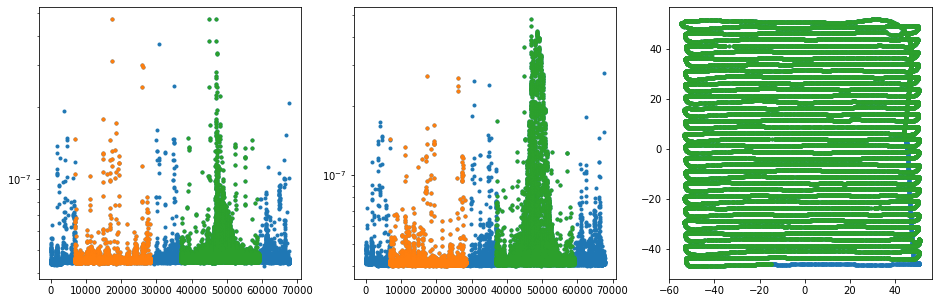

In [55]:
fig1,[ax1,ax2,ax3]=subplots(nrows=1,ncols=3,figsize=(16,5))
tlb,tub=[0,-1]
ax1.semilogy(FFNSconcat.t_index[tlb:tub],FFNSconcat.V[tlb:tub,320,0],'.')
ax2.semilogy(FFNSconcat.t_index[tlb:tub],FFNSconcat.V[tlb:tub,320,1],'.')
ax3.plot(FFNSconcat.drone_xyz_LC_interp[tlb:tub,0],FFNSconcat.drone_xyz_LC_interp[tlb:tub,1],'.')
tlb,tub=[6900,28300]
ax1.semilogy(FFNSconcat.t_index[tlb:tub],FFNSconcat.V[tlb:tub,320,0],'.')
ax2.semilogy(FFNSconcat.t_index[tlb:tub],FFNSconcat.V[tlb:tub,320,1],'.')
ax3.plot(FFNSconcat.drone_xyz_LC_interp[tlb:tub,0],FFNSconcat.drone_xyz_LC_interp[tlb:tub,1],'.')
# what is the point of this single pass highlighted in green?
tlb,tub=[37000,59000]
ax1.semilogy(FFNSconcat.t_index[tlb:tub],FFNSconcat.V[tlb:tub,320,0],'.')
ax2.semilogy(FFNSconcat.t_index[tlb:tub],FFNSconcat.V[tlb:tub,320,1],'.')
ax3.plot(FFNSconcat.drone_xyz_LC_interp[tlb:tub,0],FFNSconcat.drone_xyz_LC_interp[tlb:tub,1],'.')

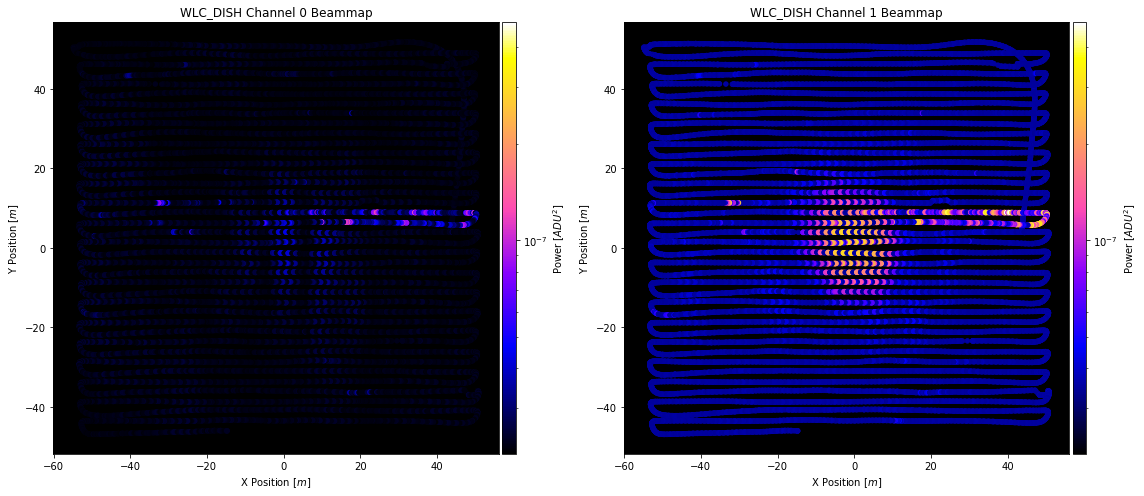

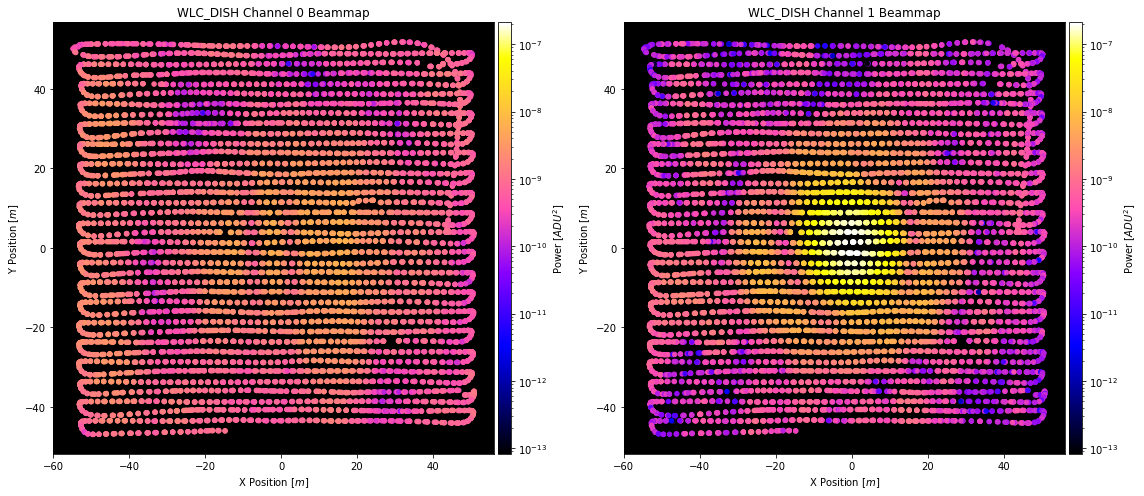

In [56]:
pu.Plot_Beammap(FFNSconcat,pulse_args=None,t_bounds=[37000,59000],dotsize=20,f_bounds=[300,301])
# savefig('NF2FF_WL/prelim_beam_maps.jpg')
pu.Plot_Beammap(FFNSconcat,pulse_args='bgsub',t_bounds=[37000,59000],dotsize=20,f_bounds=[260,270])
# savefig('NF2FF_WL/prelim_beam_maps2.jpg')